In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
df=pd.read_csv("StudentsPerformance.csv")


In [2]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.dropna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
df['math score'].mean()

66.089

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


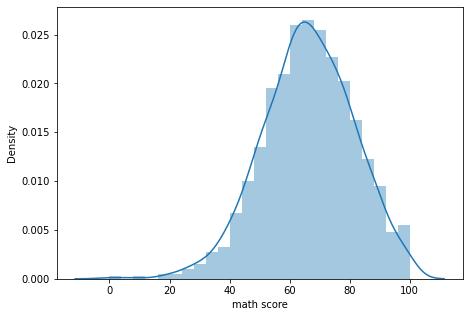

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['math score'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='math score'>

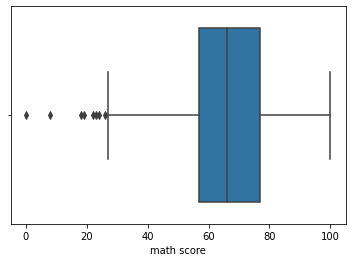

In [8]:
sns.boxplot(df['math score'])

In [9]:
Q1 = np.percentile(df['math score'], 25,
interpolation = 'midpoint')
Q3 = np.percentile(df['math score'], 75,
interpolation = 'midpoint')
IQR = Q3 - Q1
print(Q3)
print(Q1)
print(IQR)

77.0
57.0
20.0


In [10]:
upper_limit = Q1 + 1.5 * IQR
lower_limit = Q3 - 1.5 * IQR

In [11]:
print(upper_limit)
print(lower_limit)

87.0
47.0


In [12]:
df[df['math score'] > upper_limit]
df[df['math score'] < lower_limit]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
7,male,group B,some college,free/reduced,none,40,43,39
9,female,group B,high school,free/reduced,none,38,60,50
11,male,group D,associate's degree,standard,none,40,52,43
17,female,group B,some high school,free/reduced,none,18,32,28
18,male,group C,master's degree,free/reduced,completed,46,42,46
...,...,...,...,...,...,...,...,...
928,male,group E,associate's degree,free/reduced,completed,46,43,44
958,female,group D,high school,standard,none,45,63,59
980,female,group B,high school,free/reduced,none,8,24,23
986,female,group C,associate's degree,standard,none,40,59,51


In [13]:
new_df = df[df['math score'] < upper_limit] #Removing scores greater than upper limit
new_df.shape

(905, 8)

In [14]:
new_df = new_df[new_df['math score'] > lower_limit] #Removing scores less than the lower limit 
new_df.shape

(798, 8)

In [15]:
df['math score'].mean() #Before removing Outliers

66.089

In [16]:
new_df['math score'].mean() #After removing Outliers

66.67042606516291

In [17]:
#Before removing Outliers
df.shape


(1000, 8)

In [18]:
#After removing Outliers
new_df.shape

(798, 8)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

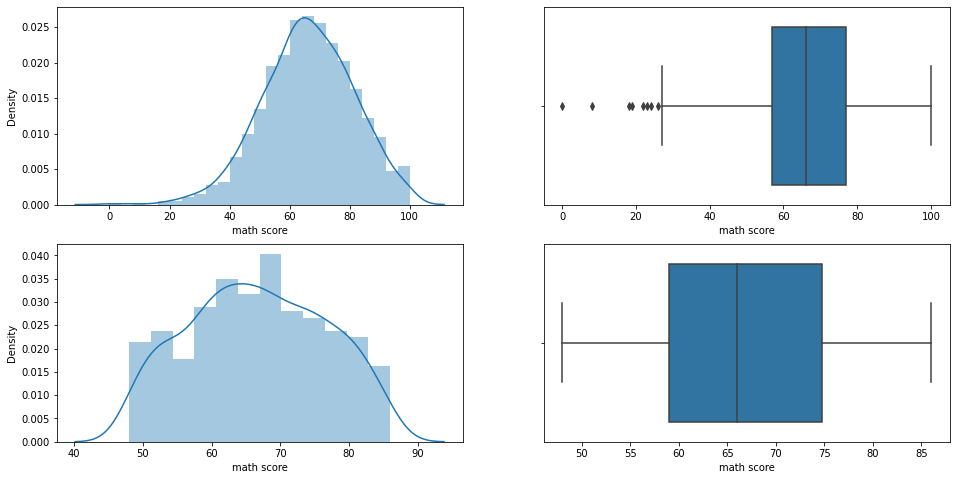

In [19]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['math score'])
plt.subplot(2,2,2)
sns.boxplot(df['math score'])
plt.subplot(2,2,3)
sns.distplot(new_df['math score'])
plt.subplot(2,2,4)
sns.boxplot(new_df['math score'])
plt.show()